In [1]:
import numpy as np
import statistics as stats
import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



Wine Quality Data

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv


In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

df = pd.read_csv(url, sep=';')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


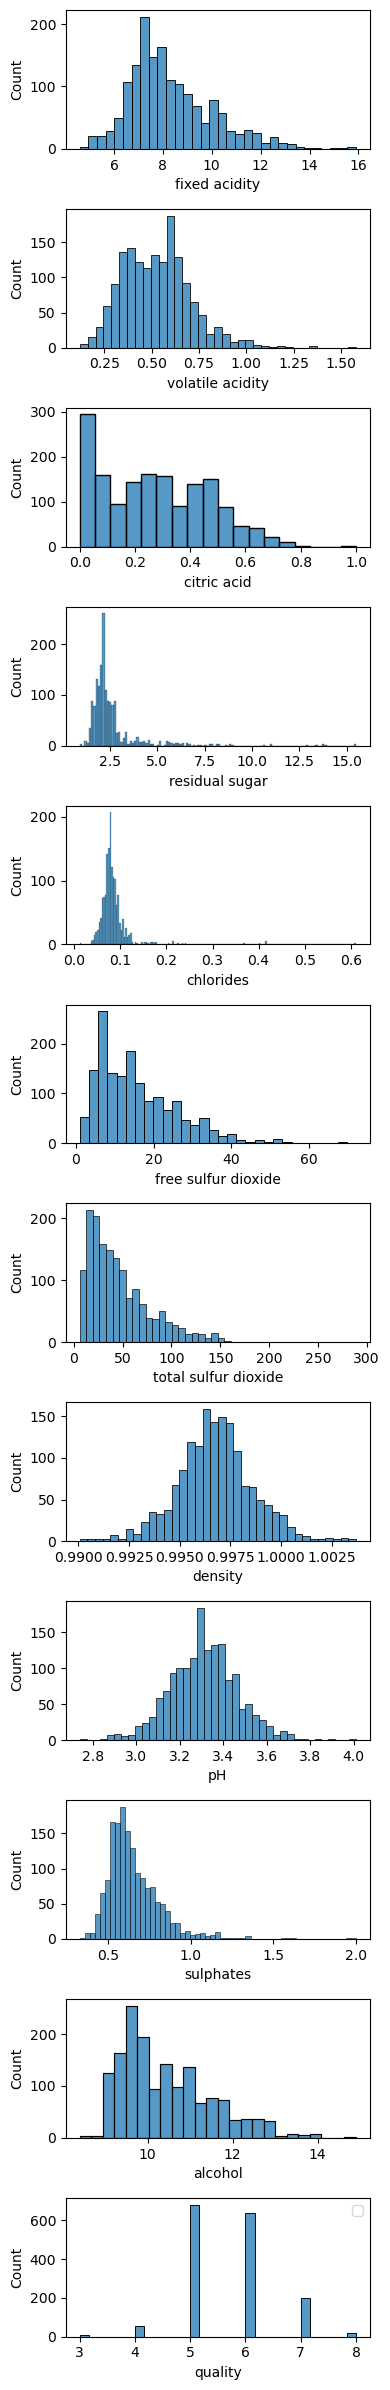

In [3]:
n_plots = df.shape[1] # or len(df.columns)

f, axs = plt.subplots(n_plots, 1, figsize=(4, 2*n_plots))

for i,x in enumerate(df):
    
    mean = df[x]
    sns.histplot(data=df[x], ax=axs[i])

plt.legend()
plt.tight_layout()

In [4]:
mean_data = df.mean()
median_data = df.median()
mode_data = df.mode()
skew_data = df.skew()
kurt_data = df.kurtosis()


In [14]:
# Can show each separately
#>> mean_data
#>> median_data
#>> mode_data ...
mean_data

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [6]:
summ_df = df.agg(['mean', 'median', 'min', 'max', 'var', 'std', 'skew', 'kurtosis'])
summ_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
median,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000
var,3.031416,0.032062,0.037947,1.987897,0.002215,109.414884,1082.102373,0.000004,0.023835,0.028733,1.135647,0.652168
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
skew,0.982751,0.671593,0.318337,4.540655,5.680347,1.250567,1.515531,0.071288,0.193683,2.428672,0.860829,0.217802
kurtosis,1.132143,1.225542,-0.788998,28.617595,41.715787,2.023562,3.809824,0.934079,0.806943,11.720251,0.200029,0.296708


In [7]:
#summ_df.loc['mean', x]

In [8]:
#def range_func(x):   
#    return np.max(x) - np.min(x)
#df.agg(range_func)

In [9]:
#summary_df = df.agg(['mean', 'median', lambda x: x.mode().iloc[0]])
#summary_df.rename(index={lambda x: x.mode().iloc[0]: 'mode'}, inplace=True)
#summary_df

In [10]:
summ_df = df.agg({
    'total sulfur dioxide': ['mean', 'median', 'skew', 'kurtosis'], 
    'density':              ['mean', 'median', 'skew', 'kurtosis']
    })

summ_df

,total sulfur dioxide,density
mean,46.467792,0.996747
median,38.000000,0.996750
skew,1.515531,0.071288
kurtosis,3.809824,0.934079


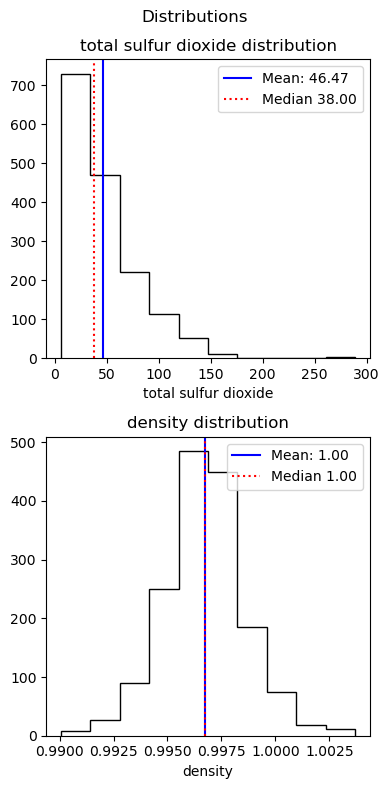

In [11]:
f, axs = plt.subplots(2, 1, figsize=(4,8))

col = 'total sulfur dioxide'

for i,col in enumerate(summ_df.columns):
    axs[i].hist(df[col], histtype='step', color='k')
    
    mean = summ_df.loc['mean', col]
    med  = summ_df.loc['median', col]
    axs[i].axvline(mean, c='blue', label=f'Mean: {mean:.2f}') # This uses f-strings to print the mean values.
    axs[i].axvline(med, c='red', ls=':', label=f'Median {med:.2f}')
    
    axs[i].legend(loc='upper right')
    
    axs[i].set_xlabel(col)
    axs[i].set_title(' '.join((col, 'distribution'))) 
    # the join operation is applied to ' '. 
    # It has a tuple of strings as an input, i.e. (col, 'distribution'). 
    # It joins together each string in the tuple and places a ' ' between each string
    
f.suptitle('Distributions')
plt.tight_layout()



In [12]:
#summ_df = df.agg({
#    'total sulfur dioxide': ['mean', 'median', 'skew', 'kurtosis', lambda x: x.mode().iloc[0]], 
#    'density':              ['mean', 'median', 'skew', 'kurtosis', lambda x: x.mode().iloc[0]]
#    })

#summ_df

#axs[i].axvline(summ_df.loc['<lambda>', col])

In [13]:
df.groupby(['quality']).agg({
    'total sulfur dioxide': ['mean', 'median'], 
    'density':              ['mean', 'median']
    })

total sulfur dioxide          density          
                        mean median      mean    median
quality                                                
3                  24.900000   15.0  0.997464  0.997565
4                  36.245283   26.0  0.996542  0.996500
5                  56.513950   47.0  0.997104  0.997000
6                  40.869906   35.0  0.996615  0.996560
7                  35.020101   27.0  0.996104  0.995770
8                  33.444444   21.5  0.995212  0.994940

See this link to note why data visualization is also important. There can be multiple types of data that have the same summary statistics, but each may look very different!

https://en.wikipedia.org/wiki/Anscombe%27s_quartet